Hemos detectado en el EDA: 
df_flight: 
- Tenemos varios Loyalty Numbers duplicados, esto no significa que tengamos que eliminarlos ya que cada fila muestra vuelos diferentes del cliente 
- Los nombres de las columnas tienen mayusculas. Las cambiaremos por minusculas.  
- No hay nulos 

df_loyalty:
- Las columnas Cancellation Year y Cancellation Month tienen valores nulos altos (87.65%), no es alarmante ya que son las fechas de cancelacion y se puede deber a que son vuelos que no se han cancelado. No obstante, estan en float, los cambiaremos a int para una lectura correcta. 
- La columna Salary un 22.32% de valores nulos, haremos gestion para esos nulos. 
- No hay duplicados en la columna Loyalty Number. 


# PARTE 2. UNION DE TABLAS Y MODIFICACION DE DATOS. 

# PARTE 3. VISUALIZACION.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df_flight= pd.read_csv("Customer Flight Activity.csv")

In [3]:
df_loyalty= pd.read_csv("Customer Loyalty History.csv")

In [4]:
df_both = df_flight.merge(df_loyalty, on="Loyalty Number")

In [5]:
df_both.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [6]:
# Cambiamos mayusculas de los nombres de las columnas. 
df_both.columns = df_both.columns.str.lower()

In [7]:
df_both.head(1)

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [8]:
df_both["cancellation year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [9]:
df_both["cancellation month"].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [10]:
# Las columnas cancellation month y cancellation month están en float, las cambiaremos a int. 
df_both['cancellation month'] = df_both['cancellation month'].astype('Int64')

In [11]:
# comprobamos que se haya hecho correctamente 
df_both["cancellation month"].unique() 

<IntegerArray>
[<NA>, 3, 9, 2, 7, 6, 8, 4, 1, 5, 11, 12, 10]
Length: 13, dtype: Int64

In [12]:
# Hacemos mismo proceso
df_both['cancellation year'] = df_both['cancellation year'].astype('Int64')

In [13]:
df_both["cancellation year"].unique()

<IntegerArray>
[<NA>, 2018, 2015, 2016, 2014, 2013, 2017]
Length: 7, dtype: Int64

# GESTION DE NULOS CON COLUMNA SALARY 

In [14]:
df_both["salary"].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.], shape=(5891,))

In [15]:
df_both["salary"].min()

np.float64(-58486.0)

In [16]:
# Usamos .abs para quitar los valores negativos
df_both['salary'] = df_both['salary'].abs()

In [17]:
df_both["salary"].max()

np.float64(407228.0)

In [18]:
# Queremos mirar la relacion entre educacion y salario y sus valores estadisticos. Hago un group by para tener una vision de ambas columnas 
estadisticas_salario = df_both.groupby('education')['salary'].agg(['count', 'mean', 'median', 'min', 'max'])
print(estadisticas_salario)

                       count           mean    median      min       max
education                                                               
Bachelor              253752   72601.235033   71971.0   9081.0  105563.0
College                    0            NaN       NaN      NaN       NaN
Doctor                 17856  178335.439516  180440.0  48109.0  407228.0
High School or Below   19008   61112.377525   61806.0  21853.0   93875.0
Master                 12336  103767.494163  105487.0  56414.0  133080.0


In [19]:
# Total de valores nulos en la columna 'salary'
nulos_salary = df_both['salary'].isna().sum()

In [20]:
# Nulos en 'salary' filtrando solo donde education == 'College'
nulos_college_salary = df_both[(df_both['education'] == 'College') & (df_both['salary'].isna())].shape[0]

In [21]:
# Lo pasamos a porcentaje
porcentaje = (nulos_college_salary / nulos_salary) * 100

In [22]:
print(f"Nulos en salary para 'College': {nulos_college_salary}")
print(f"Total de nulos en salary: {nulos_salary}")
print(f"Porcentaje que representa: {porcentaje:.2f}%")

Nulos en salary para 'College': 102672
Total de nulos en salary: 102672
Porcentaje que representa: 100.00%


# Nota:
1. Como podemos ver, College tiene el 100% de sus valores nulos en Salary. 
2. Los niveles de educacion de menor a mayor son: 
High School or Below
College
Bachelor
Master
Doctor
5. Calcularemos la media de salario entre personas con educacion High School y Bachelor.
6. Teniendola, calcularemos una media para Collegue consiguiendo una estimación de sueldo para las personas con educacion College. 

In [23]:
df_both["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [24]:
# Media de salario para highschool
media_highschool = df_both.loc[df_both['education'] == 'High School or Below', 'salary'].mean()

In [25]:
# Media de salario para Bachelor
media_bachelor = df_both.loc[df_both['education'] == 'Bachelor', 'salary'].mean()

In [26]:
# Calcular la media entre ambos
media_college = round(np.mean([media_highschool, media_bachelor]), 2)

In [27]:
print(f"Media High School or Below: {round(media_highschool, 2)}")
print(f"Media Bachelor: {round(media_bachelor, 2)}")
print(f"Media College (imputada): {media_college}")

Media High School or Below: 61112.38
Media Bachelor: 72601.24
Media College (imputada): 66856.81


In [28]:
# Imputar valores nulos en College con la media calculada
df_both.loc[(df_both['education'] == 'College') & (df_both['salary'].isnull()), 'salary'] = media_college

In [29]:
#Comprobamos que se haya hecho
college_salaries = df_both.loc[df_both['education'] == 'College', 'salary']
print(college_salaries)

1         66856.81
2         66856.81
17        66856.81
20        66856.81
21        66856.81
            ...   
405611    66856.81
405613    66856.81
405616    66856.81
405619    66856.81
405622    66856.81
Name: salary, Length: 102672, dtype: float64


In [30]:
# Comprobamos
round(df_both.isnull().sum()/df_both.shape[0]*100,2)

loyalty number                  0.00
year                            0.00
month                           0.00
flights booked                  0.00
flights with companions         0.00
total flights                   0.00
distance                        0.00
points accumulated              0.00
points redeemed                 0.00
dollar cost points redeemed     0.00
country                         0.00
province                        0.00
city                            0.00
postal code                     0.00
gender                          0.00
education                       0.00
salary                          0.00
marital status                  0.00
loyalty card                    0.00
clv                             0.00
enrollment type                 0.00
enrollment year                 0.00
enrollment month                0.00
cancellation year              87.66
cancellation month             87.66
dtype: float64

# PARTE 3. VISUALIZACION.

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
# Primero hacemos un group by de los vuelos reservados con meses de año 
vuelos_por_mes = df_both.groupby("month")["flights booked"].sum().reset_index()

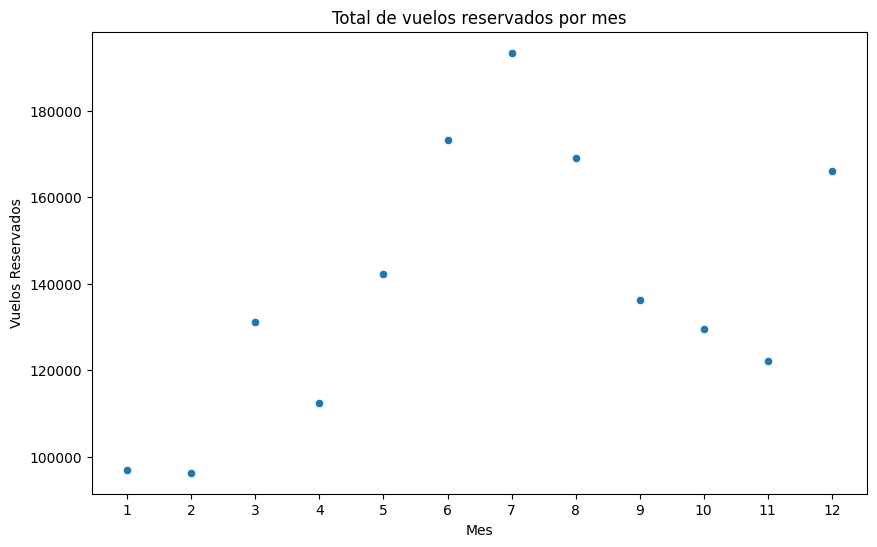

In [ ]:
# Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=vuelos_por_mes, x="month", y="flights booked")

plt.title("Total de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados")
plt.xticks(range(1,13)); # Con el range hago un rango de los meses del año para que me pueda mostrar los meses y sea mas facil de visualizar. 

# - Observaciones: 
Los meses donde se concentran la mayor cantidad de vuelos es Julio, seguido de Junio, Agosto y Diciembre. Los meses con menor cantidad de vuelos es Febrero y Enero.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

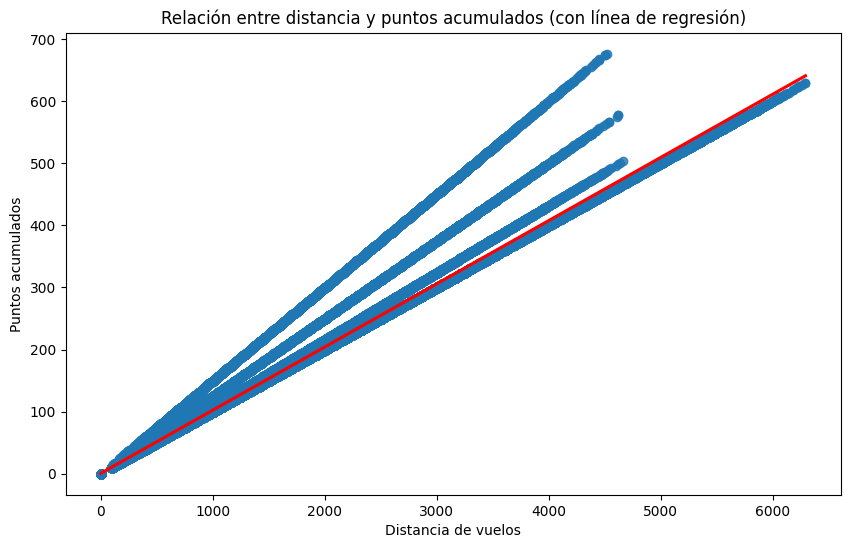

In [ ]:
#Regplot 
plt.figure(figsize=(10,6))
sns.regplot(data=df_both, x="distance", y="points accumulated", line_kws={'color':'red'})
plt.title("Relación entre distancia y puntos acumulados (con línea de regresión)")
plt.xlabel("Distancia de vuelos")
plt.ylabel("Puntos acumulados");

# - Observaciones: 
Existe una relación muy fuerte y positiva entre la distancia volada y los puntos acumulados. Esto confirma la lógica del programa de fidelidad: cuanto más vuelas, más puntos ganas.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [42]:
clientes_por_provincia = df_both['province'].value_counts().sort_values(ascending=False)

C:\Users\gabri\AppData\Local\Temp\ipykernel_31320\4243618275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_por_provincia.index, y=clientes_por_provincia.values, palette="viridis")


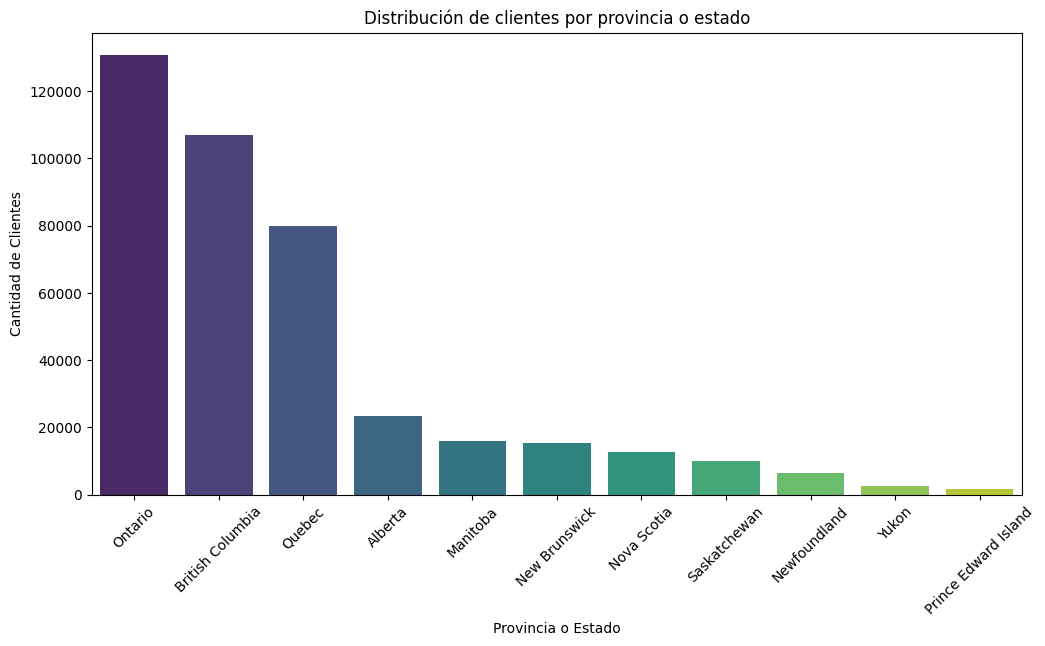

In [ ]:
# Barplot 
plt.figure(figsize=(12, 6))
sns.barplot(x=clientes_por_provincia.index, y=clientes_por_provincia.values, palette="viridis")
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia o Estado")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45);

# - Observaciones: 
La mayor cantidad de clientes son de Ontario y British Columbia. Donde tenemos una menor consentracion de clientes es en Prince Edward Island

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

C:\Users\gabri\AppData\Local\Temp\ipykernel_31320\2077339425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_both, x='education', y='salary', estimator='mean', palette='viridis')


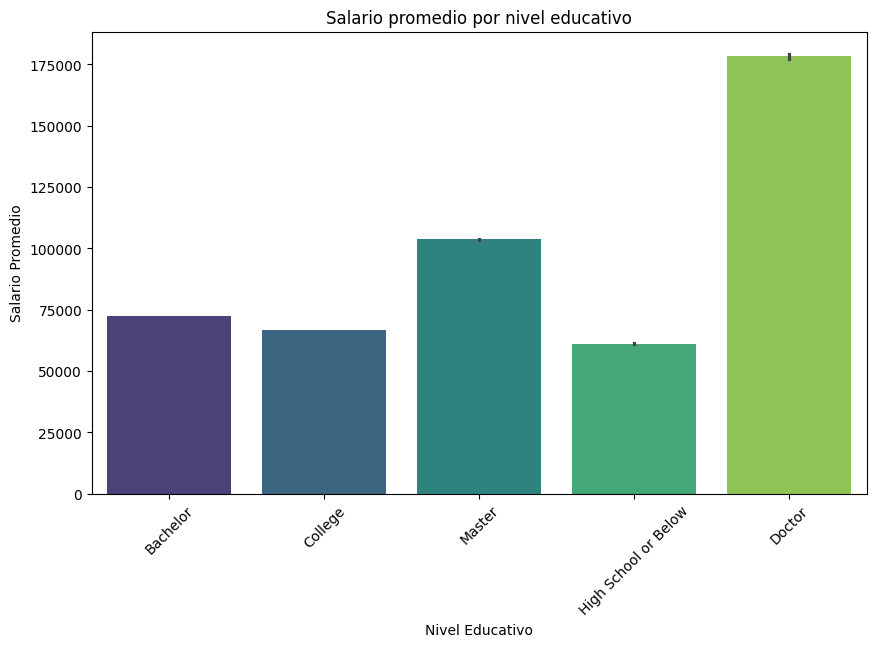

In [ ]:
# Barplot 
plt.figure(figsize=(10,6))
sns.barplot(data=df_both, x='education', y='salary', estimator='mean', palette='viridis')

plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45);

# - Observaciones: 
El salario y nivel educativo mas alto se concentrada en personas con educacion Doctor y Master. Y el menor es High School or Below. A mayor nivel educativo, mayor salario promedio segun nuestro caso. 

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
tarjetas = df_both['loyalty card'].value_counts()

Text(0.5, 1.0, 'Proporción de clientes por tipo de tarjeta de fidelidad')

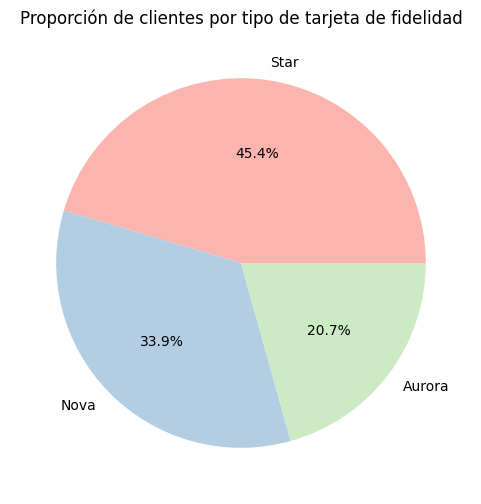

In [50]:
# PIE
plt.figure(figsize=(6, 6))
plt.pie(tarjetas.values, labels = tarjetas.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')

# - Obervaciones: 
Podemos que la mayor cantidad de tarjetas de fidelidad estan en Star, con un 45,4%, seguido por Nova con un 33.9% y por ultimo Aurora 20,7%. 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

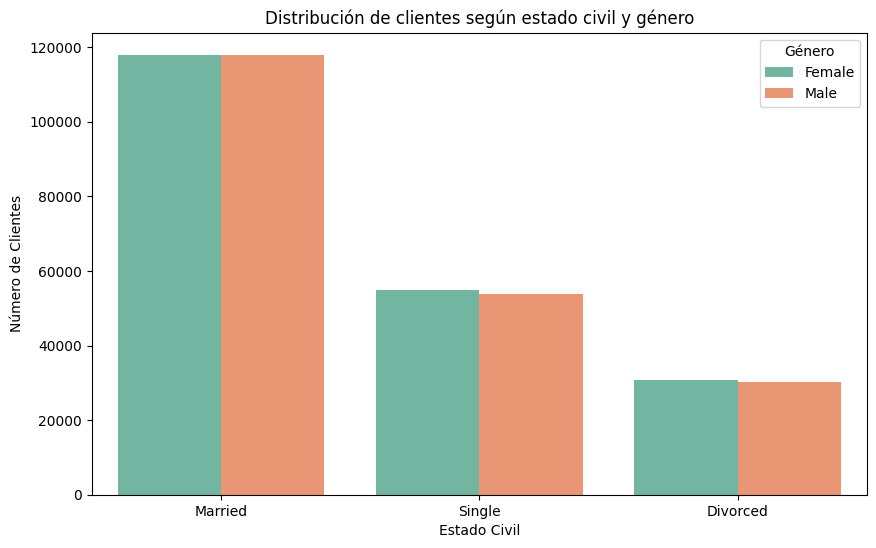

In [ ]:
# Countplot 
plt.figure(figsize=(10,6))
sns.countplot(data=df_both, x='marital status', hue='gender', palette='Set2')

plt.title('Distribución de clientes según estado civil y género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.legend(title='Género');

# - Observaciones: 
Entre mujeres y hombres no hay diferencias significativas en su estado civil, pero si podemos notar una gran diferencia en cuanto a personas casadas, solteras y divorciadas, teniendo una consentracion grande en personas casadas, media en solteras y baja en divorciadas. 